Вы — аналитик данных, и сейчас идёте в стартап, который создает новый маркетплейс. Он недавно появился на рынке и занимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу.

Продакт-менеджер Петя переживает за свой продукт, так как выручка маркетплейса стоит на месте уже несколько месяцев. Он предложил вам полную свободу действий. Главное — чтобы метрики росли, а мы не причиняли неудобства клиентам, ведь Петя заботится об их опыте.

Задачи
Вы поразмышляли и сформулировали список задач:

Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.  
Задача 2: Определить, существует ли product/market fit у этого маркетплейса.  
Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.  
Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.  
Задача 5: Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.  
Задача 6: Сформулировать выводы о проделанной работе.  

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from operator import attrgetter
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [8]:
# Загрузка данных
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [9]:
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


customers = olist_customers_dataset.csv — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя

customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта)

customer_zip_code_prefix — почтовый индекс пользователя

customer_city — город доставки пользователя

customer_state — штат доставки пользователя

In [10]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


orders = olist_orders_dataset.csv —  таблица заказов

order_id — уникальный идентификатор заказа (номер чека)

customer_id — позаказный идентификатор пользователя

order_status — статус заказа

order_purchase_timestamp — время создания заказа

order_approved_at — время подтверждения оплаты заказа

order_delivered_carrier_date — время передачи заказа в логистическую службу

order_delivered_customer_date — время доставки заказа

order_estimated_delivery_date — обещанная дата доставки

Уникальные статусы заказов в таблице olist_orders_dataset:

created — создан;
approved — подтверждён;
invoiced — выставлен счёт;
processing — в процессе сборки заказа;
shipped — отгружён со склада;
delivered — доставлен пользователю;
unavailable — недоступен;
canceled — отменён.

In [11]:
order_items.info()
order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_items = olist_order_items_dataset.csv — товарные позиции, входящие в заказы
order_id — уникальный идентификатор заказа (номер чека)

order_item_id — идентификатор товара внутри одного заказа

product_id — ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price — цена за единицу товара

freight_value — вес товара 

Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5

# Задачи 

Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.

Задача 2: Определить, существует ли product/market fit у этого маркетплейса.

Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.

Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

Задача 5: Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.

Задача 6: Сформулировать выводы о проделанной работе. 

In [12]:
# Преобразование временных меток
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


**Задача 1**

Оценить месячный retention в оформление заказа с помощью когортного анализа.

На первом этапе вы решили посмотреть на метрики маркетплейса и на возвращаемость клиента в продукт.

Для этого вам нужно:

Оценить месячный retention в оформление заказа с помощью когортного анализа, так как важно, чтобы клиенты возвращались в маркетплейс для совершения больших покупок.

В рамках исследования необходимо:

-Исследовать датасет и определить, какой вид заказа будет учитываться в retention

-Построить месячный retention

-Проанализировать, чему равен медианный retention 1-го месяца

-Найти когорту с самым высоким retention на 3-й месяц.

In [13]:
# соединяем два датасета
orders = pd.merge(orders, customers, on='customer_id', how='left')

In [14]:
# Создаем копию данных, дабы избежать изменений в исходном DataFrame
data_copy = orders.copy()

In [15]:
# Фильтрация заказов по статусу
data_copy = data_copy[data_copy['order_status'] == 'delivered']

In [16]:
# Извлекаем месяц и день заказа
data_copy['order_period'] = data_copy['order_purchase_timestamp'].dt.to_period('M')

data_copy['order_period_day'] = data_copy['order_purchase_timestamp'].dt.to_period('D')

In [17]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя
data_copy['cohort'] = data_copy.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
data_copy['cohort_day'] = data_copy.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [18]:
# Рассчитываем номер периода в днях (месячные периоды, деленные на 30)
data_copy['period_number_month'] = np.floor((data_copy.order_period_day - data_copy.cohort_day).apply(attrgetter('n')) / 30)

In [19]:
# Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
orders_cohort = data_copy.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [20]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = orders_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]

In [22]:
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


Теперь рассчитаем усредненный retention за первый месяц по всем когортам.

In [24]:
median_retention = retention_matrix[1.0].median()
median_retention

0.0035460992907801418

In [21]:
# ищем когорту с самым высоким retention на 3-й месяц.
retention_matrix[3.0]

cohort
2016-09         NaN
2016-10         NaN
2016-12         NaN
2017-01    0.005579
2017-02    0.003686
2017-03    0.004395
2017-04    0.000443
2017-05    0.002318
2017-06    0.003622
2017-07    0.002399
2017-08    0.003451
2017-09    0.003247
2017-10    0.001155
2017-11    0.001558
2017-12    0.001873
2018-01    0.003362
2018-02    0.002704
2018-03    0.002362
2018-04    0.002279
2018-05    0.000615
2018-06         NaN
2018-07         NaN
2018-08         NaN
Freq: M, Name: 3.0, dtype: float64

In [22]:
retention_matrix[3.0].idxmax()

Period('2017-01', 'M')

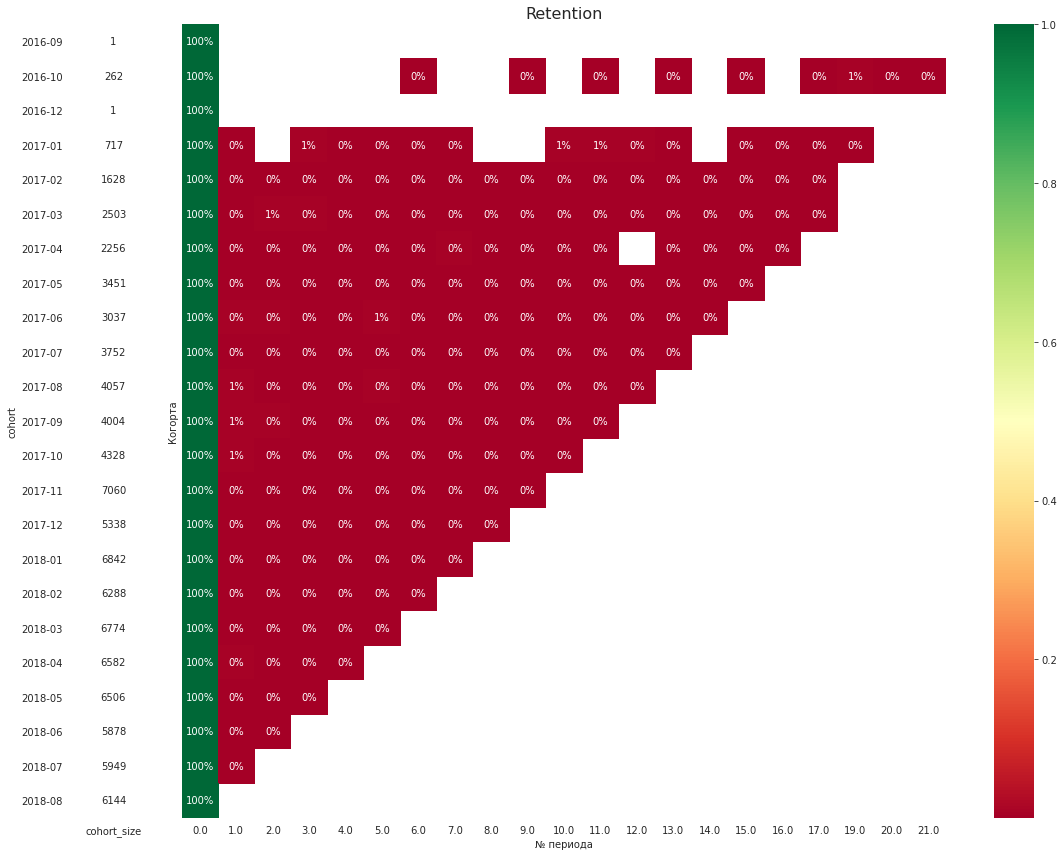

In [25]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

**Задача 2** 

Определить, существует ли product/market fit у маркетплейса.

Построив retention, вы решили оценить, насколько хорошо продукт закрывает потребности клиента.

Для этого вам нужно:

Определить, существует ли product/market fit у этого маркетплейса. Ведь до сих пор непонятно, можно ли масштабировать подобный продукт на новые рынки. Есть вероятность, что маркетплейс будет приносить убытки.

В рамках исследования необходимо:

Оценить наличие product/market fit у данного продукта с помощью когортного анализа, полученного на предыдущем шаге.
Пояснить свою позицию и сформулировать, на чём маркетплейс должен сконцентрироваться в ближайшее время.

**Ответ 2**

Проблемы с product/market fit, выявленные в когортном анализе

Тепловая карта retention показывает, что продукт слабо соответствует ожиданиям рынка: уже через месяц после первой покупки остается лишь 0,3% пользователей, а на второй месяц удержание падает до нуля. Это может говорить о:

-Низкой ценности или отсутствии уникальности продукта,

-Проблемах с качеством товара или сервиса,

-Несоответствии ожиданиям клиентов (например, из-за сложного процесса заказа, долгой доставки или некорректного позиционирования).

С текущими показателями удержания выход на новые рынки несет высокие риски — низкий retention делает CAC (стоимость привлечения) неокупаемым. Для уверенного масштабирования маркетплейсу в ближайшее время необходимо сосредоточиться на повышении удержания клиентов.

**Задача 3**

Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.  
Вы разобрались с наличием product/market fit. Теперь вас просят сформулировать продуктовые метрики маркетплейса, чтобы компания могла на них ориентироваться.  
В первую очередь необходимо:  
Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.  
Первая метрика должна отражать рост продаж маркетплейса.  
Вторая — показывать объем аудитории, которой продукт доставляет ценность.  
Третья — отражать заинтересованность новых клиентов в продакте.  
Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.  
Пятая — отражать денежное выражение вовлеченности клиента.  
Визуализируйте первую, вторую, четвёртую и пятую метрики. Используйте месячную гранулярность и созревание 1 месяц, если это нужно.  

**1. Рост продаж маркетплейса: Gross Merchandise Volume, GMV (Общий объем продаж)
Метрика отражает общий объем продаж через маркетплейс за определенный период. Она показывает, насколько успешно маркетплейс привлекает покупателей и генерирует доход.**

In [26]:
# Объединение данных по заказам и товарам
gmv_data = data_copy.merge(order_items[['order_id', 'price']], on='order_id')
# Агрегация по периоду заказа:
monthly_gmv = gmv_data.groupby('order_period')['price'].sum().reset_index()
# Преобразование типа данных:
monthly_gmv['order_period'] = monthly_gmv['order_period'].astype(str)
# Переименование столбцов:
monthly_gmv.columns = ['order_period', 'GMV']

monthly_gmv

,order_period,GMV
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40
5,2017-03,359198.85
6,2017-04,340669.68
7,2017-05,489338.25
8,2017-06,421923.37
9,2017-07,481604.52


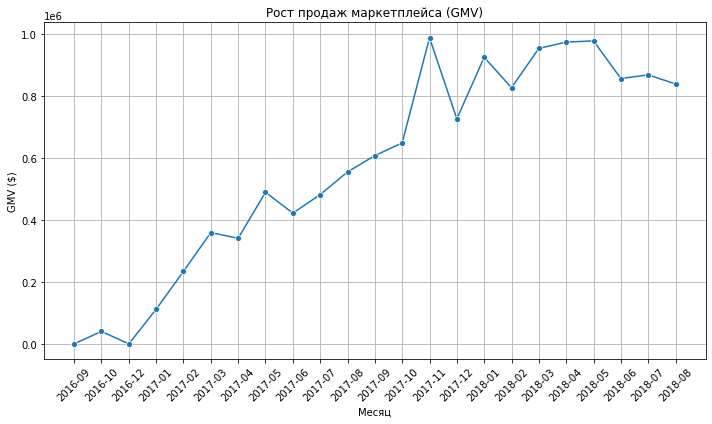

In [27]:
# Визуализация метрик
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_gmv, x='order_period', y='GMV', marker='o')
plt.title('Рост продаж маркетплейса (GMV)')
plt.xlabel('Месяц')
plt.ylabel('GMV ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.show()

**2. Объем аудитории, которой продукт доставляет ценность: Active User (Количество активных(платящих) клиентов) 
Метрика, отражающая число пользователей, которые совершили хотя бы одну покупку на маркетплейсе за определённый период (например, месяц). Этот показатель помогает оценить реальный объем аудитории, получающей ценность от маркетплейса, а также измерить вовлеченность и платежеспособность клиентов.**

In [29]:
# Группировка данных по временной метке заказа и подсчет уникальных пользователей
active_users = data_copy.groupby('order_purchase_timestamp')['customer_unique_id'].nunique().reset_index()
# Создание столбца с годом и месяцем покупки:
active_users['year_month'] = active_users['order_purchase_timestamp'].dt.to_period('M')
# Группировка по месяцу и суммирование уникальных пользователей:
monthly_active_users = active_users.groupby('year_month')['customer_unique_id'].sum().reset_index()
# Переименование столбцов для удобства:
monthly_active_users.columns = ['Month', 'Active Users']

monthly_active_users

,Month,Active Users
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,745
4,2017-02,1650
5,2017-03,2540
6,2017-04,2296
7,2017-05,3532
8,2017-06,3126
9,2017-07,3856


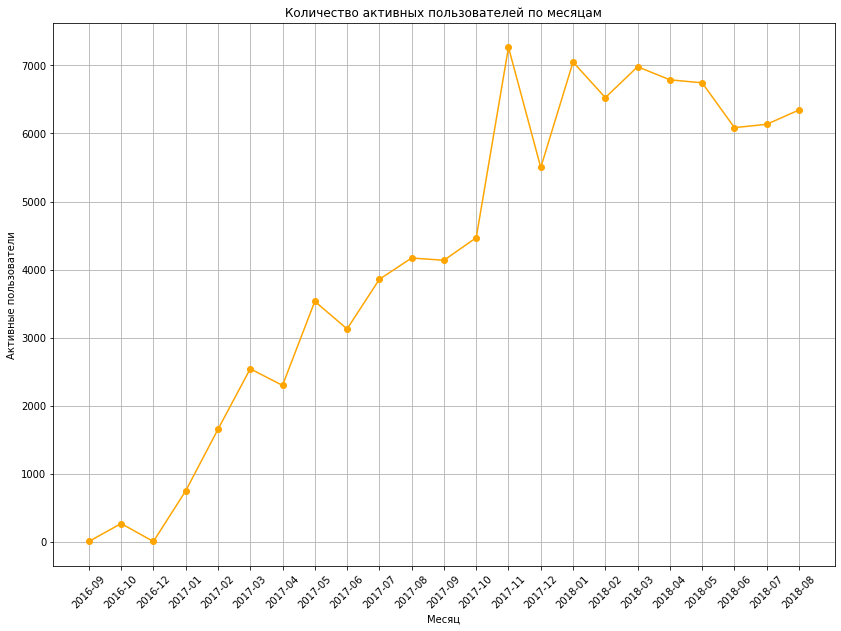

In [30]:
# Визуализация метрик
plt.figure(figsize=(14, 10))

plt.plot(monthly_active_users['Month'].astype(str), monthly_active_users['Active Users'], marker='o', color='orange')
plt.title('Количество активных пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Активные пользователи')
plt.xticks(rotation=45)
plt.grid()

plt.show()

**3. Заинтересованность новых клиентов в продукте: Conversion to Paying User (Конверсия в первую покупку)
Метрика, показывающая долю новых пользователей, которые совершили свою первую покупку на маркетплейсе за определённый период. Этот показатель отражает степень заинтересованности новых клиентов и их готовность воспользоваться предложением, а также помогает оценить эффективность маркетинговых и продуктовых стратегий по привлечению и вовлечению аудитории.**

**4. Вовлеченность клиента в продолжение использования продукта: Retention Rate (Коэффициент удержания)
Метрика, отражающая процент пользователей, которые продолжают пользоваться маркетплейсрм спустя определённый период времени (например, неделю, месяц или год) после первого взаимодействия. Этот показатель помогает оценить уровень вовлеченности клиентов, их удовлетворенность маркетплейсом и способность бизнеса поддерживать долгосрочные отношения с пользователями. Высокий коэффициент удержания свидетельствует о ценности и востребованности продукта, в то время как низкий может указывать на проблемы с пользовательским опытом или конкуренцию на рынке.**

In [31]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


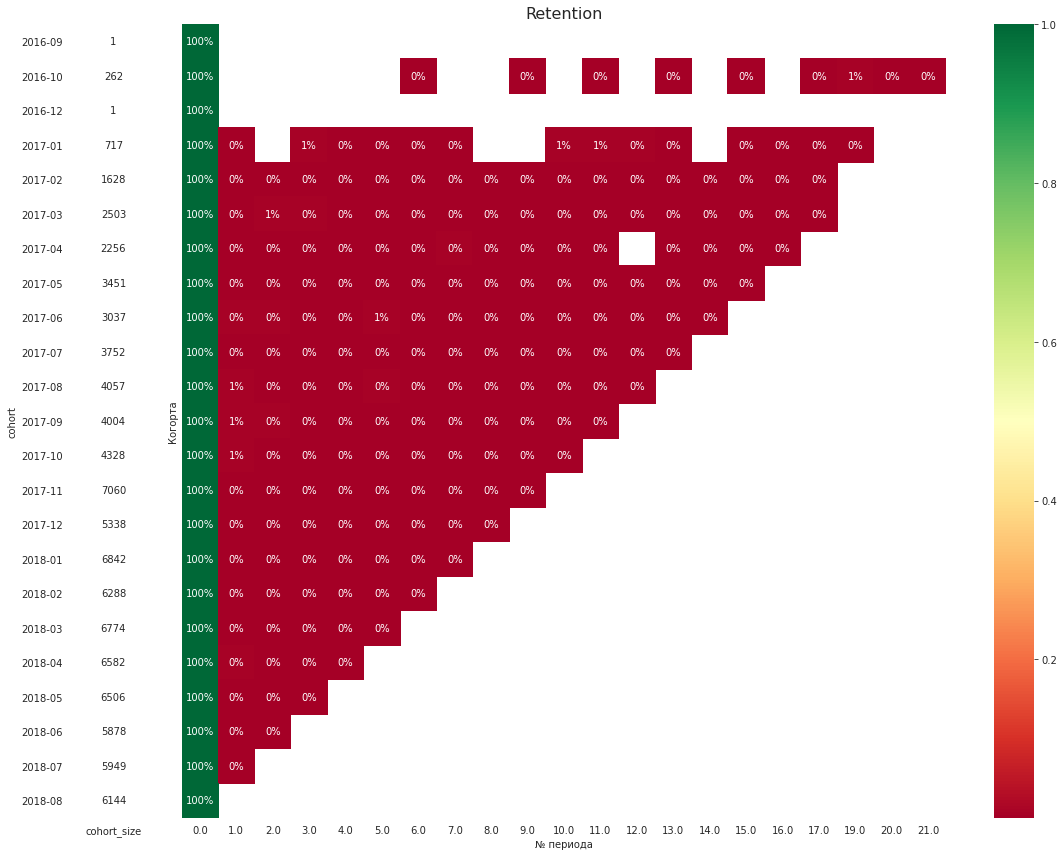

In [32]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    
    plt.show()

**5. Денежное выражение вовлеченности клиента: Average Revenue Per Paying User, ARPPU (Средний доход на платящего пользователя)
Метрика отражает общую выручку, которую маркетплейс получает с одного клиента в среднем**

In [36]:
# Объединение данных о клиентах, заказах и GMV:
merge_data = customers.merge(orders).merge(gmv_data)
# Группировка по периоду заказа и расчет метрик:
monthly_revenue = merge_data.groupby('order_period').agg(
    total_revenue=('price', 'sum'),
    paying_users=('customer_unique_id', 'nunique')).reset_index()
# Расчет ARRPU
monthly_revenue['ARRPU'] = monthly_revenue['total_revenue'] / monthly_revenue['paying_users']
# смена формата
monthly_revenue['order_period'] = monthly_revenue['order_period'].astype(str)

monthly_revenue[['order_period', 'total_revenue', 'paying_users', 'ARRPU']]

,order_period,total_revenue,paying_users,ARRPU
0,2016-09,134.97,1,134.970000
1,2016-10,40325.11,262,153.912634
2,2016-12,10.90,1,10.900000
3,2017-01,111798.36,718,155.708022
4,2017-02,234223.40,1630,143.695337
5,2017-03,359198.85,2508,143.221232
6,2017-04,340669.68,2274,149.810765
7,2017-05,489338.25,3479,140.654858
8,2017-06,421923.37,3076,137.166245
9,2017-07,481604.52,3802,126.671362


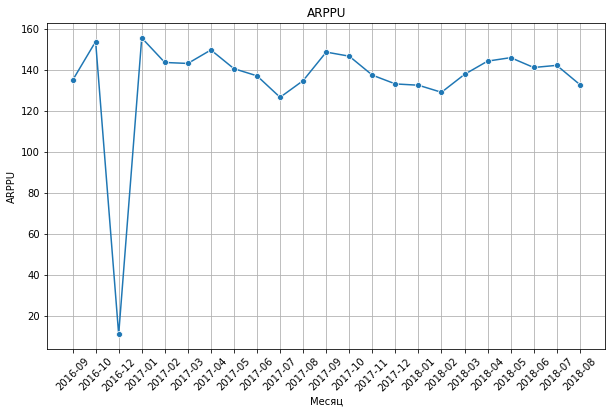

In [37]:
# Визуализация метрик
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='order_period', y='ARRPU', marker='o')
plt.title('ARPPU')
plt.xlabel('Месяц')
plt.ylabel('ARPPU')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Задача 4**

Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.  
Посмотрев с продактом на когортный анализ и метрики, вы решили, что нужно изменить продукт. Метрики необходимо срочно повышать. Вместе с командой вы сформулировали 3 гипотезы, в которые вы верите. По каждой гипотезе команда заполнила показатели по Ease, Confidence. Вам нужно заполнить самый важный показатель — Impact. Для этого вам требуется:  
Выбрать одну из трёх основных гипотез с помощью фреймворка ICE, которые были сформированы продактом и, кажется, должны улучшить пользовательский опыт в маркетплейсе.  
Для расчёта Impact возьмите данные с июня 2017 года. Конверсию в повторный заказ возьмите из пункта 1 из показателя "медианный retention 1-го месяца".  
Гипотезы:  
Гипотеза 1: Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится.  
Гипотеза 2: Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.  
Гипотеза 3: Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

**Гипотеза 1**

Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

In [38]:
Confidence_1 = 8
Ease_1 = 6

In [39]:
# количество отмененных заказов с июня 2017 года
canceled = orders.query( 'order_purchase_timestamp > "2017-06-01 00:00:00" & order_status == "canceled"').order_id.count()
canceled

499

In [40]:
# Определяем Impact 
if canceled <= 50:
    impact = 1
elif canceled <= 150:
    impact = 2
elif canceled <= 350:
    impact = 3
elif canceled <= 750:
    impact = 4
elif canceled <= 1550:
    impact = 5
elif canceled <= 3150:
    impact = 6
elif canceled <= 6350:
    impact = 7
elif canceled <= 12750:
    impact = 8
elif canceled <= 25550:
    impact = 9
else:
    impact = 10
    
impact_1 = impact
print(f"Impact_1: {impact_1}")

Impact_1: 4


In [41]:
ICE_1 = impact * Confidence_1 * Ease_1
print(f"ICE_1: {ICE_1}")

ICE_1: 192


**Гипотеза 2** 

Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [42]:
# Конверсию в повторный заказ (медианный retention 1-го месяца) median_retention = 0.35
Confidence_2 = 10
Ease_2 = 4

In [43]:
# заказы с опозданием
orders_late= orders.query('order_purchase_timestamp > "2017-06-01 00:00:00" & order_delivered_customer_date > order_estimated_delivery_date & order_status == "delivered"')
# клиенты, получившие заказы с опозданием
customers_late = orders_late[['order_id', 'customer_id']].merge(customers[['customer_unique_id', 'customer_id']], on = 'customer_id').customer_unique_id.nunique() 
customers_late

7245

In [44]:
# клиенты, получившие заказы с опозданием с учетом конвесии 
customers = customers_late * median_retention
customers

25.69148936170213

In [45]:
# Определяем Impact 
if customers <= 50:
    impact = 1
elif customers <= 150:
    impact = 2
elif customers <= 350:
    impact = 3
elif customers <= 750:
    impact = 4
elif customers <= 1550:
    impact = 5
elif customers <= 3150:
    impact = 6
elif customers <= 6350:
    impact = 7
elif customers <= 12750:
    impact = 8
elif customers <= 25550:
    impact = 9
else:
    impact = 10
    
impact_2 = impact
print(f"Impact_2: {impact_2}")

Impact_2: 1


In [46]:
ICE_2 = impact_2 * Confidence_2 * Ease_2
print(f"ICE_2: {ICE_2}")

ICE_2: 40


**Гипотеза 3**

Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [47]:
# Конверсию в повторный заказ (медианный retention 1-го месяца) median_retention = 0.35
Confidence_3 = 5
Ease_3 = 9

In [48]:
# подсчитываем количество заказов для каждого клиента
cust_order_counts = data_copy[(data_copy.order_period >= '2017-06')].groupby('customer_unique_id').order_id.nunique().reset_index()

cust_order_counts.groupby('order_id').nunique('customer_unique_id')

,customer_unique_id
order_id,
1,80558
2,2137
3,129
4,23
5,9
6,2
7,3
9,1
15,1


In [49]:
# количество клиентов, которые сделали один заказ
one_order_cust_count = (cust_order_counts == 1).order_id.sum()
one_order_cust_count

80558

In [50]:
# Возможное количество повторных заказов
repeat = one_order_cust_count * median_retention
repeat

285.6666666666667

In [51]:
# Определяем Impact 
if repeat <= 50:
    impact = 1
elif repeat <= 150:
    impact = 2
elif repeat <= 350:
    impact = 3
elif repeat <= 750:
    impact = 4
elif repeat <= 1550:
    impact = 5
elif repeat <= 3150:
    impact = 6
elif repeat <= 6350:
    impact = 7
elif repeat <= 12750:
    impact = 8
elif repeat <= 25550:
    impact = 9
else:
    impact = 10
    
impact_3 = impact
print(f"Impact_3: {impact_3}")

Impact_3: 3


In [52]:
ICE_3 = impact_3 * Confidence_3 * Ease_3
print(f"ICE_3: {ICE_3}")

ICE_3: 135


**Итого  (так как ICE_1 = 192 ICE_2 = 40 ICE_3 = 135)**

Гипотеза 1 (Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.), должны улучшить пользовательский опыт в маркетплейсе.

Гипотеза 3 (Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.) со значением ICE = 132, следующая имеет наибольший потенциал для улучшения пользовательского опыта и увеличения выручки.  
При сравнении по фреймворку ICE из 3 гипотез выигрывает гипотеза 1.

**Заача 5**

Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.

После предыдущего исследования у вас появилась гипотеза, которую можно реализовать для значительного улучшения метрик компании. Вы предложили использовать A/B-тестирование для проверки её эффективности.

Продакт попросил вас:

Сформулировать метрики, на которые должна повлиять выбранная вами гипотеза.
Сформулировать хотя бы по одной метрике в категории: целевые, прокси, guardrail.

1. Целевые метрики (Target Metrics)
Целевые метрики — это те метрики, которые напрямую отражают успех вашей гипотезы. В данном случае, мы хотим увидеть улучшение в количестве доставленных заказов и уменьшение количества отмен.

**Количество доставленных заказов (показывает общее количество заказов, которые были успешно доставлены покупателям за определенный период (например, день, месяц, квартал)**

2. Прокси метрики (Proxy Metrics)
Прокси метрики — это метрики, которые могут служить индикаторами успеха целевых метрик. Они могут не быть прямыми показателями, но их изменение может указывать на изменения в целевых метриках.

**Конверсия в доставку (показывает долю заказов, которые были успешно доставлены покупателям, от общего числа оформленных заказов за определенный период.)**

3. Защитные метрики (Guardrail Metrics)
Защитные метрики — это метрики, которые помогают убедиться, что изменения не приводят к негативным последствиям для бизнеса или клиентов. Они служат для мониторинга потенциальных рисков.

**Конверсия в оформление заказа (показывает процент пользователей, которые добавили товары в корзину и успешно оформили заказ. Она отражает, насколько эффективно работает процесс оформления заказа и насколько мотивированы пользователи довести покупку до конца.)**

**Задача 6**

Вот и подошёл к концу ваш первый этап работы аналитиком в команде маркетплейса. Теперь необходимо поделиться результатами проведённой работы с компанией.


Сформулируйте выводы о проделанной работе, опишите их в комментариях в ipynb-файле или описании мердж-реквеста. 
Структура должна выглядеть следующим образом:
   - формализация проблемы продукта;

   - описание выводов из пункта 1;

   - описание выводов из пункта 2;

   - описание выводов из пункта 3;

   - описание выводов из пункта 4;

   - описание выводов из пункта 5;

   - общие выводы по итогу исследования;

   - рекомендации по продукту.

# Вывод и рекомендации:

**Формализация проблемы продукта:** 
    
    Отсутсвует рост выручки

    
    


**Описание выводов из пункта 1:**
    
    После проведение кагортного анализа мы выяснили, что уровень Retention – менее 1% клиентов совершают повторные покупки.
    Выручка поддерживается за счет привлечения новых пользователей.

**Описание выводов из пункта 2:**
    
    Из пункта 1 следует, что у маркетплейса слабый product/market fit. Это может свидетельствовать о низкой ценности или уникальности продукта, несоответствии ожиданиям клиентов, а также проблемах с качеством товаров, процессом оформления заказов или доставкой.
    
    При отсутствии устойчивого product/market fit масштабирование на новые рынки несет значительные риски. Чтобы обеспечить успешное развитие, маркетплейсу необходимо в первую очередь сосредоточиться на повышении удержания клиентов.
    
    

 **Описание выводов из пункта 3:**
    
    Ключевые метрики для максимизации прибыли маркетплейса:
        
    GMV (Общий объем продаж)
    Active User (Количество активных(платящих) клиентов)
    Conversion to Paying User (Конверсия в первую покупку)
    Retention Rate (Коэффициент удержания)
    ARPPU (Средний доход на платящего пользователя)
    


**Описание выводов из пункта 4:**
    
    Проверка гипотез с использованием фреймворка ICE показал, что наибольшее влияние на рост ключевых метрик окажут изменения, предложенные в гипотезе 1 (Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.), так как ее ICE = 192.
    Исправление бага в системе процессинга заказов устранит проблему отмен заказов, что приведет к увеличению количества успешно доставленных заказов. Это, в свою очередь, повысит удовлетворенность клиентов, увеличит Retention за счет снижения негативного опыта пользователей, а также положительно повлияет на выручку и ARPPU. В долгосрочной перспективе исправление этой ошибки может снизить переменные расходы, связанные с возвратами и обработкой отмен.

**Описание выводов из пункта 5:**
    
    Принятая нами гипотеза 1 повлияет на следующие метрики:  
    Целевая: Количество доставленных заказов (показывает общее количество заказов, которые были успешно доставлены  покупателям за определенный период)  
    Прокси:  Конверсия в доставку (показывает долю заказов, которые были успешно доставлены покупателям, от общего  числа оформленных заказов за определенный период.)  
    Защитная метрика: Конверсия в оформление заказа (показывает процент пользователей, которые добавили товары в    корзину и успешно оформили заказ. Она отражает, насколько эффективно работает процесс оформления заказа и насколько мотивированы пользователи довести покупку до конца.)

**Общие выводы по итогу исследования:**
    
    Отсутствие роста выручки связано с низким уровнем Retention – менее 1% клиентов совершают повторные покупки. Выручка поддерживается за счет привлечения новых пользователей, что указывает на отсутствие product/market fit, а значит, масштабирование пока невозможно. Основной фокус должен быть на повышении возврата клиентов.
    Итого без улучшения Retention рост выручки останется нестабильным. Улучшение удержания клиентов станет драйвером роста всех ключевых метрик.

# Рекомендации по продукту:
    
        
Первоночально устранить баг в системе процессинга заказов, который приводит к отменам. Это положительно повлияет на доход, прибыль, ARPU, CSAT и Retention.
Также маркетплейсу необходимо выстраивать долгосрочные отношения с клиентами, обеспечивая качественный сервис, персонализированные предложения и удобный процесс покупки. Это поможет снизить отток пользователей и повысить повторные покупки.

    
